In [16]:
!pip install EoN
!pip install ffmpeg-python
!pip install ffmpeg
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import csv
import EoN as eon
import pandas as pd
import operator
from operator import attrgetter, itemgetter

## Keywords
#### BC - Betweenness Centrality
#### EC - Eigenvector Centrality


In [10]:
#importing the csv files
nodes = pd.read_csv('1.0nodes.csv')
edges = pd.read_csv('1.0edges.csv')

#creating Graph for EC (G) and BC (H)
G = nx.from_pandas_edgelist(edges, source='Source', target='Target', edge_attr=True)
H = nx.from_pandas_edgelist(edges, source='Source', target='Target', edge_attr=True)

#calculating eigenvector and betweenness centralities for each node
eigenvector_centrality = nx.eigenvector_centrality(G)
betweenness_centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

In [7]:
# DELETE BEFORE SUBMISSION The key is that data is normalised using nx functions, thus why the same Id (59) instead of 1.0 displays value around 0.2
# DELETE BEFORE SUBMISSION https://github.com/networkx/networkx/blob/a299546d0c70016c2d2154654864e9aaa8969233/networkx/algorithms/centrality/eigenvector.py#L25
#most central node Id - 59, Least central node Id - 858

def ec_descending (g, x=all): #graph; nodes number
    ec_top_value = sorted(eigenvector_centrality.items(), reverse=True, key=lambda x: x[1])[:35777]
    print("Id & Eigenvector Centrality values in node(s): ")
    if x==all:
        for ec in ec_top_value[:]: #print all EC nodes in descending order
            print(ec) 
    else:
        for ec in ec_top_value[:x]: #print top x EC nodes in descending order
            print(ec)
ec_descending(G, 1)

def ec_ascending (g, x=all): #graph; nodes number
    ec_top_value = sorted(eigenvector_centrality.items(), reverse=False, key=lambda x: x[1])[:35777]
    print("Id & Eigenvector Centrality values in node(s): ")
    if x==all:
        for ec in ec_top_value[:]: #print all EC nodes in ascending order
            print(ec) 
    else:
        for ec in ec_top_value[:x]: #print top x EC nodes in ascending order
            print(ec)
ec_ascending(G, 1)

Id & Eigenvector Centrality values in node(s): 
(59, 0.199800160827237)
Id & Eigenvector Centrality values in node(s): 
(858, 1.5684687372311457e-20)


In [12]:
#Id 3498 - Least betwenness centrality displaying node picked accidentally out of list of smallest values that were all the same
#Id 59 - Most betweenness centrality displaying node

def bc_descending (h, x=all): #graph; nodes number
    bc_top_value = sorted(betweenness_centrality.items(), reverse=True, key=lambda x: x[1])[:35777]
    print("Id & Betweenness Centrality values in node(s): ")
    if x==all:
        for bc in bc_top_value[:]: #print all nodes with betweenness centrality
            print(bc) 
    else:
        for bc in bc_top_value[:x]: #print top x nodes with betweenness centrality
            print(bc) 
bc_descending(H, 1)

def bc_ascending (h, x=all): #graph; nodes number
    bc_top_value = sorted(betweenness_centrality.items(), reverse=False, key=lambda x: x[1])[:35777]
    print("Id & Betweenness Centrality values in node(s): ")
    if x==all:
        for bc in bc_top_value[:]: #print all nodes with betweenness centrality
            print(bc) 
    else:
        for bc in bc_top_value[:x]: #print top x nodes with betweenness centrality
            print(bc) 
bc_ascending(H, 1)

Id & Betweenness Centrality values in node(s): 
(59, 0.16654620505086024)
Id & Betweenness Centrality values in node(s): 
(858, 0.0)


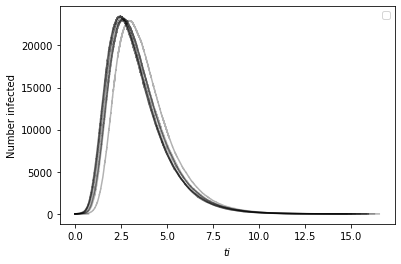

In [29]:
# Most influential EC Node (Id 59)
for node_Id59 in {59: 0.199800160827237}:{}
gamma = 1.0 # recovery rate per node
tau = 0.25 # transmission rate per edge
iterations = 10 #simulation iterations
tmax = 20
N=10**5
initial_infecteds = node_Id59
G=nx.barabasi_albert_graph(N, 5) 
for counter in range(iterations):
    t, S, I, R = eon.fast_SIR(G, tau, gamma, initial_infecteds, tmax=tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

plt.xlabel('$ti$')
plt.ylabel('Number infected') 
plt.legend("")

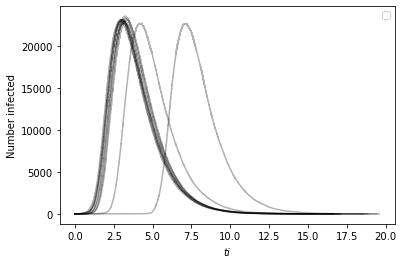

In [30]:
# Least influential EC Node (Id 858)
for node_Id858 in {858: 1.5684687372311457e-20}:{}
gamma = 1.0 # recovery rate per node
tau = 0.25 # transmission rate per edge
iterations = 10 #simulation iterations
tmax = 20
N=10**5
initial_infecteds = node_Id858
G=nx.barabasi_albert_graph(N, 5) 
for counter in range(iterations):
    t, S, I, R = eon.fast_SIR(G, tau, gamma, initial_infecteds, tmax=tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

plt.xlabel('$ti$')
plt.ylabel('Number infected') 
plt.legend("")

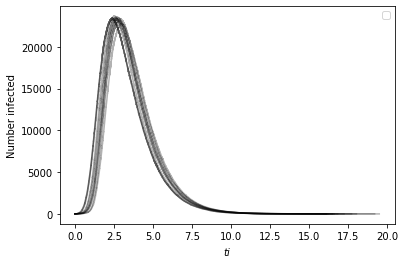

In [31]:
# Most Betweenness quality showing BC Node (Id 59)
for node_Id59 in {59: 0.16654620505086024}:{}
gamma = 1.0 # recovery rate per node
tau = 0.25 # transmission rate per edge
iterations = 10 #simulation iterations
tmax = 20
N=10**5
initial_infecteds = node_Id59
G=nx.barabasi_albert_graph(N, 5) 
for counter in range(iterations):
    t, S, I, R = eon.fast_SIR(G, tau, gamma, initial_infecteds, tmax=tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

plt.xlabel('$ti$')
plt.ylabel('Number infected') 
plt.legend("")

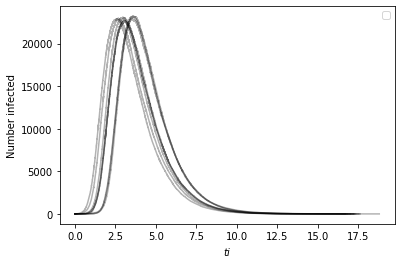

In [32]:
# Least Betweenness quality showing BC Node (Id 858)
for node_Id858 in {858: 0.0}:{}
gamma = 1.0 # recovery rate per node
tau = 0.25 # transmission rate per edge
iterations = 10 #simulation iterations
tmax = 20
N=10**5
initial_infecteds = node_Id858
G=nx.barabasi_albert_graph(N, 5) 
for counter in range(iterations):
    t, S, I, R = eon.fast_SIR(G, tau, gamma, initial_infecteds, tmax=tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

plt.xlabel('$ti$')
plt.ylabel('Number infected') 
plt.legend("")

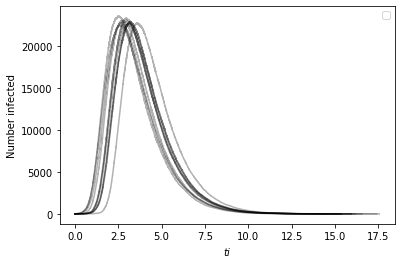

In [33]:
# Most influential EC Node (Id 59)
for node_Id59 in {59: 0.199800160827237}:{}
gamma = 1.0 # recovery rate per node
tau = 0.25 # transmission rate per edge
iterations = 10 #simulation iterations
tmax = 20
N=10**5
initial_infecteds = node_Id59
G=nx.barabasi_albert_graph(N, 5) 
for counter in range(iterations):
    t, S, I, R = eon.fast_SIR(G, tau, gamma, initial_infecteds, tmax=tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

plt.xlabel('$ti$')
plt.ylabel('Number infected') 
plt.legend("")

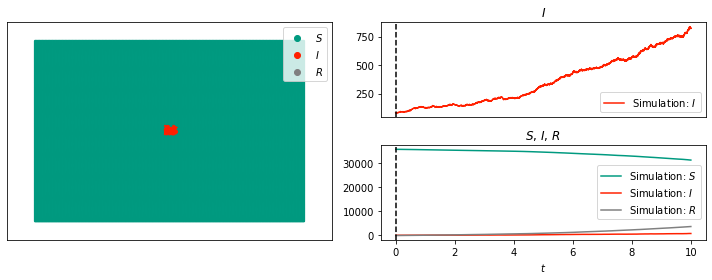

In [36]:
#35777 sq. root around 189
G = nx.grid_2d_graph(189, 189) #each node is (u,v) where 0<=u,v<=189
initial_infections = [(u,v) for (u,v) in G if 90<u<100 and 90<v<100]
initial_infecteds = node_Id59
sim = eon.fast_SIR(G, 2.0, 1.0, initial_infecteds = initial_infections,
               return_full_data=True, tmax = 10)
pos = {node:node for node in G}
sim.set_pos(pos)
ani=sim.animate(ts_plots=['I', 'SIR'], node_size = 4)
ani.save('vidtest.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

In [37]:
%%HTML
<div align="middle">
<video width="90%" controls>
      <source src="vidtest.mp4" type="video/mp4">
</video></div>